In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
features = pd.read_csv(r'data\csv\features.csv')
numeric_features = features.select_dtypes(include='number')

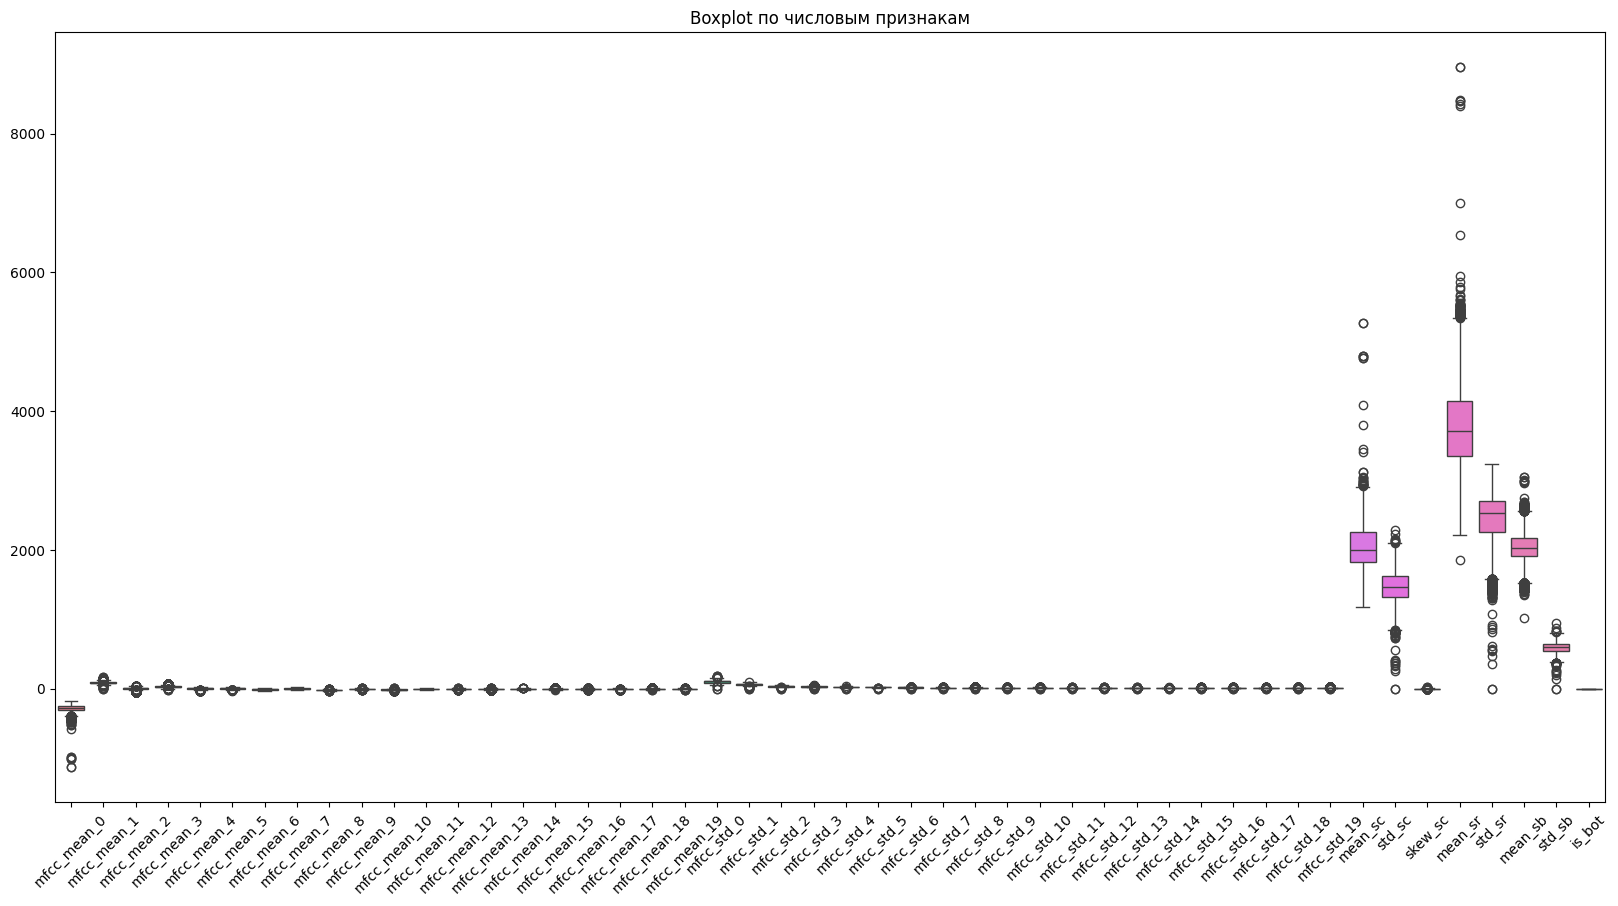

In [7]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=numeric_features)
plt.title("Boxplot по числовым признакам")
plt.xticks(rotation=45)
plt.show()

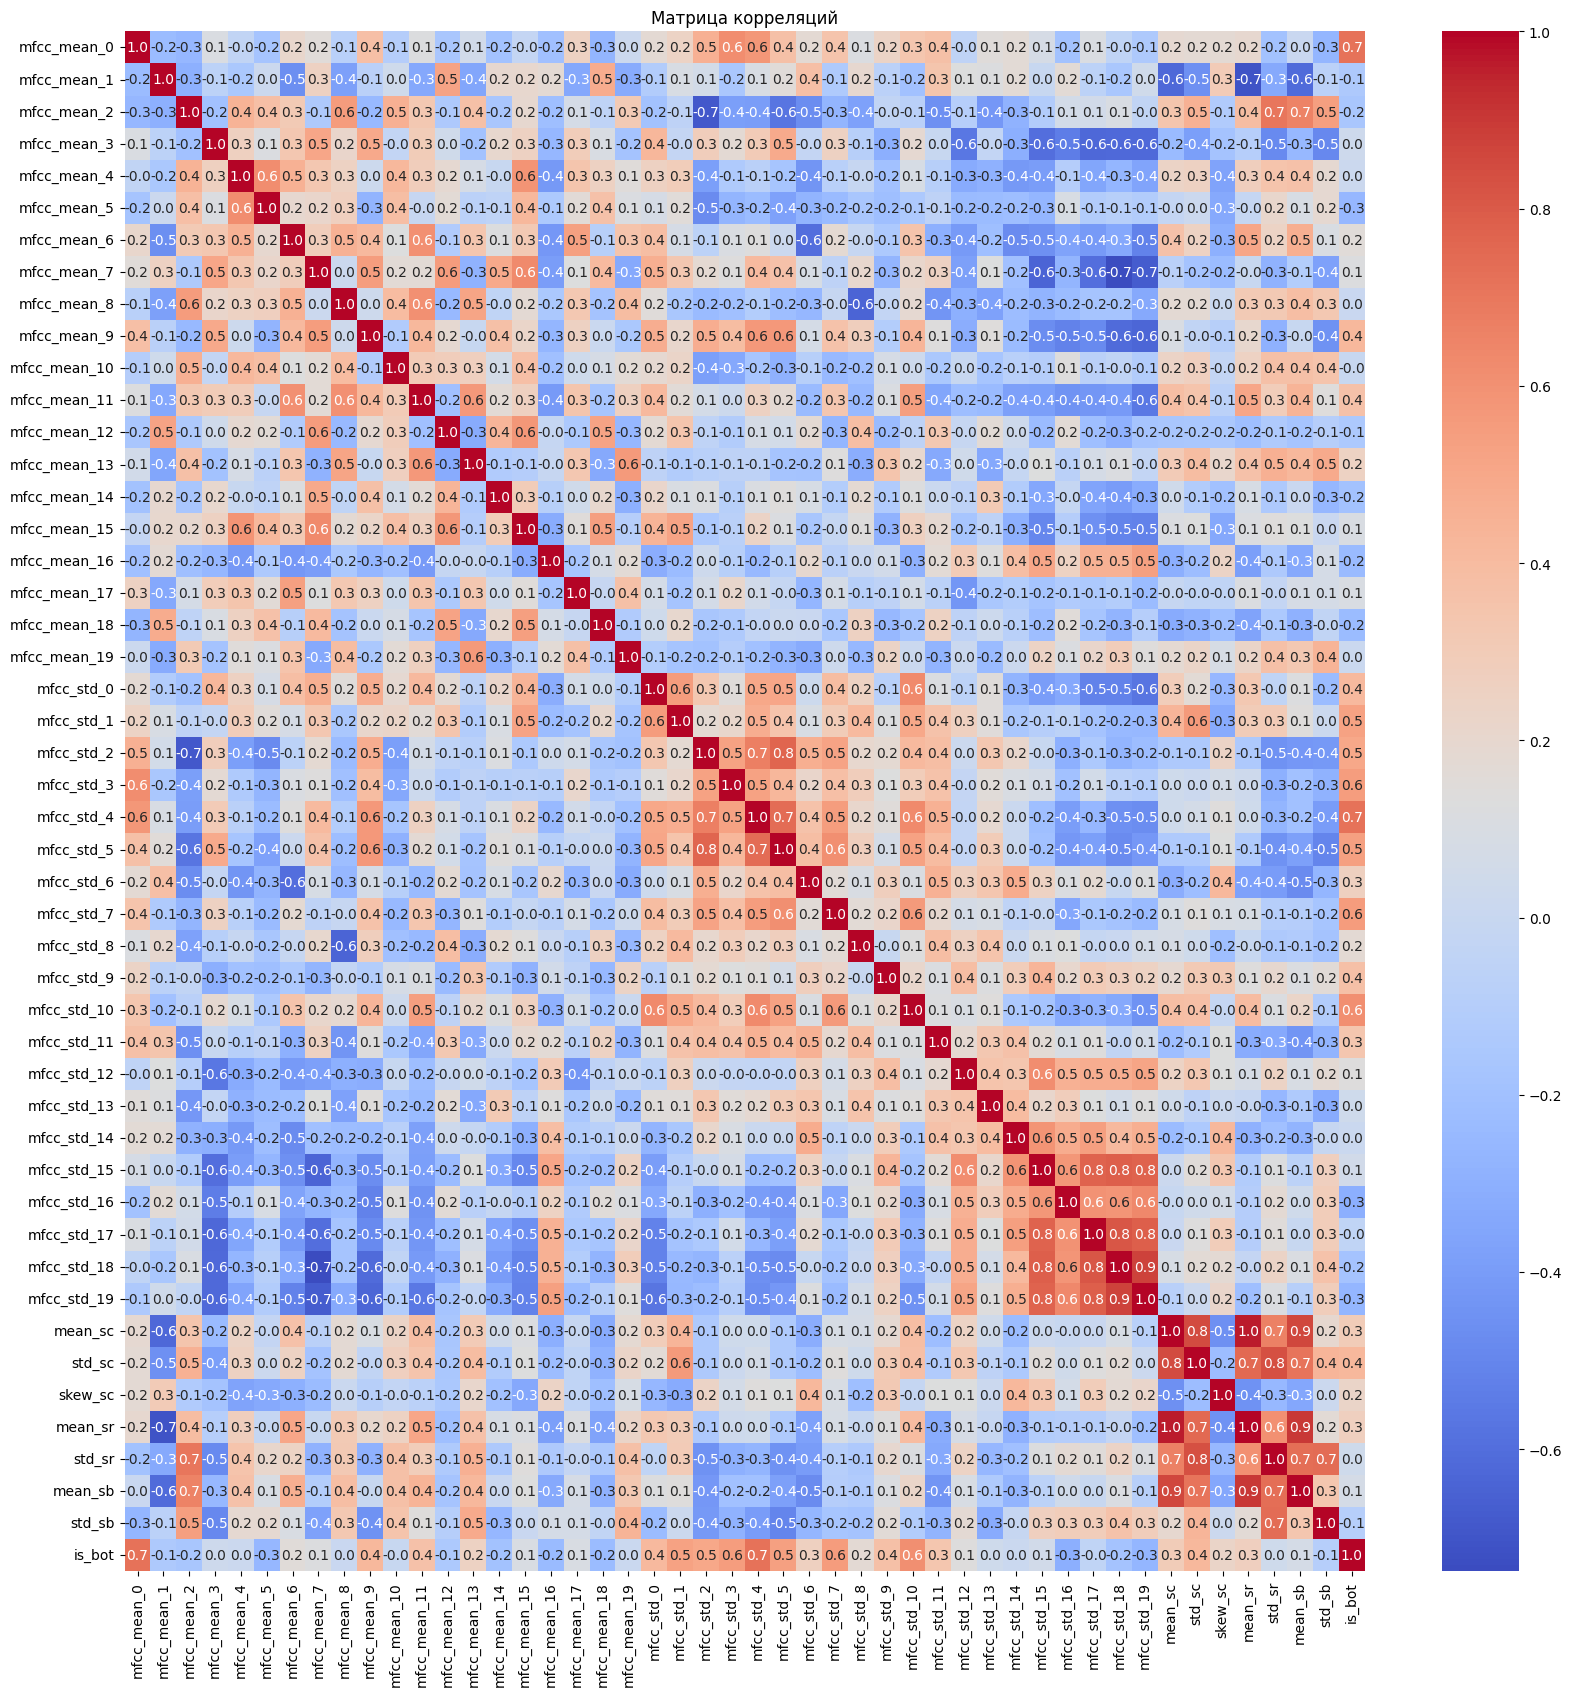

In [8]:
corr_matrix = numeric_features.corr(method='spearman')
plt.figure(figsize=(20, 20)) 
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='coolwarm',
            fmt='.1f')      # Сколько знаков после запятой
plt.title("Матрица корреляций")
plt.show()

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X, y = features.drop(['audio_name', 'is_bot'], axis=1), features['is_bot']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

num_components = pca.n_components_
print(f"Изначально признаков: {X.shape[1]}")
print(f"Осталось компонент (для 95% информации): {num_components}")

columns = [f'PC{i+1}' for i in range(num_components)]
df_pca = pd.DataFrame(data=X_pca, columns=columns)

df_pca['is_bot'] = features['is_bot']

print("\nПервые 5 строк новой таблицы:")
df_pca


Изначально признаков: 47
Осталось компонент (для 95% информации): 24

Первые 5 строк новой таблицы:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,is_bot
0,-0.143277,2.822853,-1.638430,0.600236,-1.015603,1.343225,2.784331,2.818781,0.414694,0.421973,...,0.246452,0.285680,-0.325119,-1.076454,-1.801141,-0.457149,1.047187,0.561140,-1.092613,0
1,-1.422024,5.215236,-2.503042,0.854521,-0.645566,1.003055,0.905033,1.347318,-0.371033,-1.299165,...,-0.133091,-0.050749,-0.267352,0.229035,0.132721,0.271414,0.276211,0.231390,-0.144558,0
2,-2.067598,6.115923,-2.234457,0.592669,-0.621770,-0.149002,0.805168,0.913886,0.445472,0.911352,...,-0.609316,-0.423984,-0.830457,0.012848,-0.871053,0.912875,0.754629,-0.431261,0.396181,0
3,-1.946158,5.946284,-2.032467,0.320297,-0.475959,0.488737,0.209740,1.162377,0.206863,-0.173666,...,-0.028338,0.271765,-0.194754,0.511803,-0.064012,0.127313,0.030681,0.069806,0.205006,0
4,-1.703980,5.481861,-2.662471,-0.448678,-0.326305,0.707157,0.912823,1.546053,-0.047341,0.203259,...,-0.380251,0.698565,-0.045886,-0.096369,0.174753,0.533360,-0.462328,-0.254863,-0.395403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,-0.398048,0.796970,2.676152,-0.534272,-1.543072,-0.070035,-0.311866,1.870709,-0.313622,0.613304,...,0.246965,0.346873,0.692815,0.623604,-0.054785,0.929321,-0.067761,-0.502204,0.477817,1
8155,-0.473688,0.542586,2.823955,-0.084449,-0.822975,1.200184,-0.645644,0.523989,0.390453,-0.810946,...,0.554904,-0.503263,0.541576,-0.314227,-0.588336,-0.002912,0.402376,0.503216,0.594897,1
8156,-0.424412,0.287263,4.263717,-0.549668,-1.184967,-0.252710,-1.361912,0.859392,0.269167,-0.207515,...,0.167596,-0.589118,0.546406,-0.320893,-0.427623,1.283660,0.401381,0.035954,0.274252,1
8157,-0.078878,-0.036514,3.377987,-0.673017,-0.480709,-0.373141,-1.097488,0.209976,0.040447,0.167783,...,-0.018871,-0.948724,0.524491,0.027287,0.572749,0.450533,0.077587,0.422115,0.662727,1
